# 컴퓨터 비전 - Selective Search(SS)

- 빠른 Detection과 높은 Recall(재현율) 예측 성능을 동시에 만족하는 알고리즘
- 원본 이미지 입력 - Segmentation - Object 나열(후보)
    - 개별 Segment된 모든 부분들을 Bounding Box로 묶어서 Region Proposal 리스트로 추가
    - 입력 이미지에 대한 컬러 무늬, 형태 등에 따라 최초 Segmentation이 이루어짐.
    - 위의 두 가지를 반복하여 유사성이 높은 것들끼리 묶어서 하나의 객체를 Box로 표현한다.

## 필요한 모듈 설치 (Opencv-python, SelectiveSearch)

!pip install opencv-python

!pip install selectivesearch

## 필요한 모듈 호출

In [1]:
import selectivesearch
import cv2 # opencv-python
import matplotlib.pyplot as plt
import numpy as np

## 이미지(데이터) 불러오기

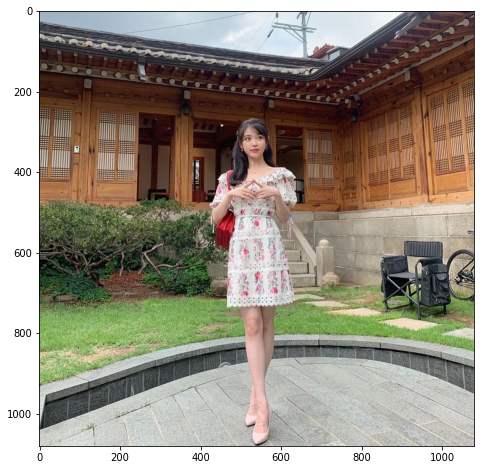

In [2]:
img = cv2.imread('./iu_cv.jpg') # BGR 형태
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB 형태로 변경
plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [3]:
a, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

In [4]:
regions

[{'rect': (0, 0, 533, 64), 'size': 20825, 'labels': [0.0]},
 {'rect': (386, 0, 193, 96), 'size': 7060, 'labels': [1.0]},
 {'rect': (487, 0, 180, 103), 'size': 6931, 'labels': [2.0]},
 {'rect': (617, 0, 290, 126), 'size': 19725, 'labels': [3.0]},
 {'rect': (635, 0, 303, 186), 'size': 12074, 'labels': [4.0]},
 {'rect': (882, 0, 192, 68), 'size': 4374, 'labels': [5.0]},
 {'rect': (789, 0, 290, 144), 'size': 11679, 'labels': [6.0]},
 {'rect': (235, 13, 264, 72), 'size': 9766, 'labels': [7.0]},
 {'rect': (0, 30, 193, 49), 'size': 4100, 'labels': [8.0]},
 {'rect': (489, 41, 166, 72), 'size': 6269, 'labels': [9.0]},
 {'rect': (0, 57, 266, 113), 'size': 10416, 'labels': [10.0]},
 {'rect': (246, 57, 590, 146), 'size': 26224, 'labels': [11.0]},
 {'rect': (115, 60, 501, 66), 'size': 12007, 'labels': [12.0]},
 {'rect': (751, 60, 328, 441), 'size': 38655, 'labels': [13.0]},
 {'rect': (939, 67, 140, 86), 'size': 3566, 'labels': [14.0]},
 {'rect': (869, 70, 159, 72), 'size': 3978, 'labels': [15.0]},


## rect 값을 리스트에 담기

In [5]:
cand_rects = [cand['rect'] for cand in regions]
cand_rects

[(0, 0, 533, 64),
 (386, 0, 193, 96),
 (487, 0, 180, 103),
 (617, 0, 290, 126),
 (635, 0, 303, 186),
 (882, 0, 192, 68),
 (789, 0, 290, 144),
 (235, 13, 264, 72),
 (0, 30, 193, 49),
 (489, 41, 166, 72),
 (0, 57, 266, 113),
 (246, 57, 590, 146),
 (115, 60, 501, 66),
 (751, 60, 328, 441),
 (939, 67, 140, 86),
 (869, 70, 159, 72),
 (914, 94, 165, 98),
 (0, 96, 263, 78),
 (497, 114, 242, 42),
 (653, 127, 189, 90),
 (0, 128, 166, 107),
 (712, 132, 212, 109),
 (950, 139, 129, 259),
 (107, 152, 253, 201),
 (541, 169, 171, 53),
 (957, 178, 87, 218),
 (272, 182, 351, 123),
 (870, 192, 93, 267),
 (73, 196, 64, 315),
 (373, 197, 186, 47),
 (540, 206, 259, 291),
 (951, 213, 108, 249),
 (0, 214, 107, 206),
 (380, 228, 179, 37),
 (171, 240, 207, 312),
 (122, 243, 147, 228),
 (377, 244, 183, 94),
 (247, 251, 93, 225),
 (320, 261, 118, 267),
 (490, 267, 94, 120),
 (382, 281, 111, 170),
 (635, 289, 98, 189),
 (0, 309, 83, 231),
 (464, 311, 56, 133),
 (580, 316, 77, 129),
 (278, 326, 51, 144),
 (239, 33

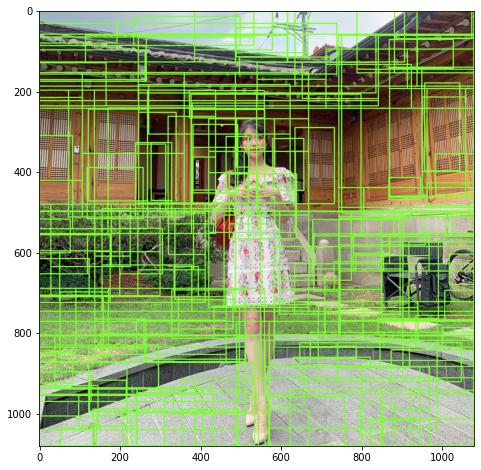

In [6]:
choice_rgb = (125,255,51) # 임의의 색상
img_rgb_copy = img_rgb.copy()
for rect in cand_rects: # rect = [l, t, r ,b], 크기
    left = rect[0]
    top = rect[1]
    right = rect[2] + left # 위치
    bottom = rect[3] + top # 위치
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=choice_rgb, thickness=2)
    
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

## 'size' 조건을 걸어줄 수도 있다.

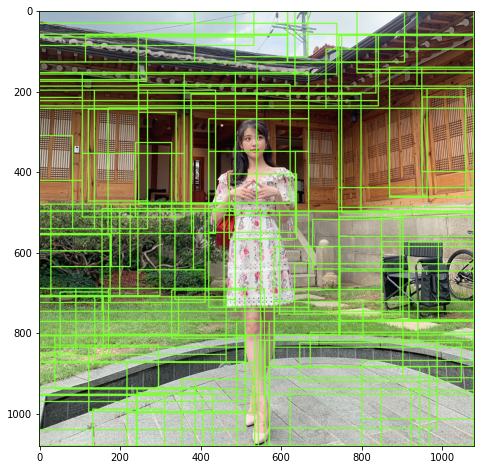

In [7]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

choice_rgb = (125,255,51) # 임의의 색상
img_rgb_copy = img_rgb.copy()
for rect in cand_rects: # rect = [l, t, r ,b], 크기
    left = rect[0]
    top = rect[1]
    right = rect[2] + left # 위치
    bottom = rect[3] + top # 위치
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=choice_rgb, thickness=2)
    
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

## Ground-Truth Box 설정
- Ground-Truth : 모델이 실제 예측하기 원하는 값

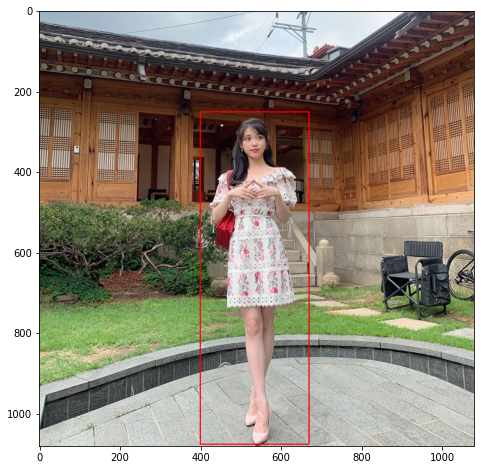

In [8]:
choice_rgb = (255,0,0) # 임의의 색상
img_rgb_copy1 = img_rgb.copy()
img_rgb_copy1 = cv2.rectangle(img_rgb_copy1, (400, 250), (670, 1075), color=choice_rgb, thickness=2)
    
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy1)
plt.show()

## IoU 계산 함수 구현
- IoU : 모델이 예측한 결과와 Ground Truth Box가 얼마나 정확하게 겹치는가를 나타내는 수치
- IoU = Box가 서로 겹치는 영역 / 전체 Box의 합집합 영역

In [9]:
def compute_iou(cand_box, gt_box): # Ground Truth Box를 사용해 IoU를 구함
    x1=np.maximum(cand_box[0], gt_box[0])
    y1=np.maximum(cand_box[1], gt_box[1])
    x2=np.minimum(cand_box[2], gt_box[2])
    y2=np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_box_area = ((cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1]))
    gt_box_area = ((gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1]))
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

In [10]:
cand_rects.sort()
cand_rects

[(0, 0, 533, 64),
 (0, 0, 533, 85),
 (0, 0, 907, 126),
 (0, 0, 938, 186),
 (0, 0, 1079, 186),
 (0, 0, 1079, 241),
 (0, 0, 1079, 497),
 (0, 0, 1079, 497),
 (0, 0, 1079, 497),
 (0, 0, 1079, 745),
 (0, 0, 1079, 804),
 (0, 0, 1079, 1079),
 (0, 0, 1079, 1079),
 (0, 30, 616, 96),
 (0, 30, 739, 126),
 (0, 57, 266, 113),
 (0, 57, 266, 117),
 (0, 57, 842, 165),
 (0, 57, 842, 178),
 (0, 57, 1079, 184),
 (0, 152, 487, 593),
 (0, 152, 487, 593),
 (0, 152, 669, 593),
 (0, 196, 137, 344),
 (0, 196, 269, 344),
 (0, 196, 438, 356),
 (0, 196, 438, 356),
 (0, 196, 438, 356),
 (0, 214, 107, 206),
 (0, 309, 83, 231),
 (0, 479, 300, 227),
 (0, 479, 412, 230),
 (0, 479, 412, 244),
 (0, 479, 487, 266),
 (0, 496, 1079, 455),
 (0, 496, 1079, 583),
 (0, 496, 1079, 583),
 (0, 496, 1079, 583),
 (0, 555, 176, 168),
 (0, 595, 176, 128),
 (0, 688, 91, 160),
 (0, 688, 172, 168),
 (0, 688, 464, 182),
 (0, 688, 511, 182),
 (0, 688, 559, 263),
 (0, 770, 571, 309),
 (0, 770, 1079, 309),
 (0, 806, 513, 163),
 (0, 806, 513

image shape (1080, 1080, 3)
index :  144 iou :  0.43086868686868685 rectangle :  (421, 348, 669, 735)
index :  185 iou :  0.43086868686868685 rectangle :  (421, 348, 669, 735)
index :  200 iou :  0.5210505050505051 rectangle :  (421, 267, 669, 735)


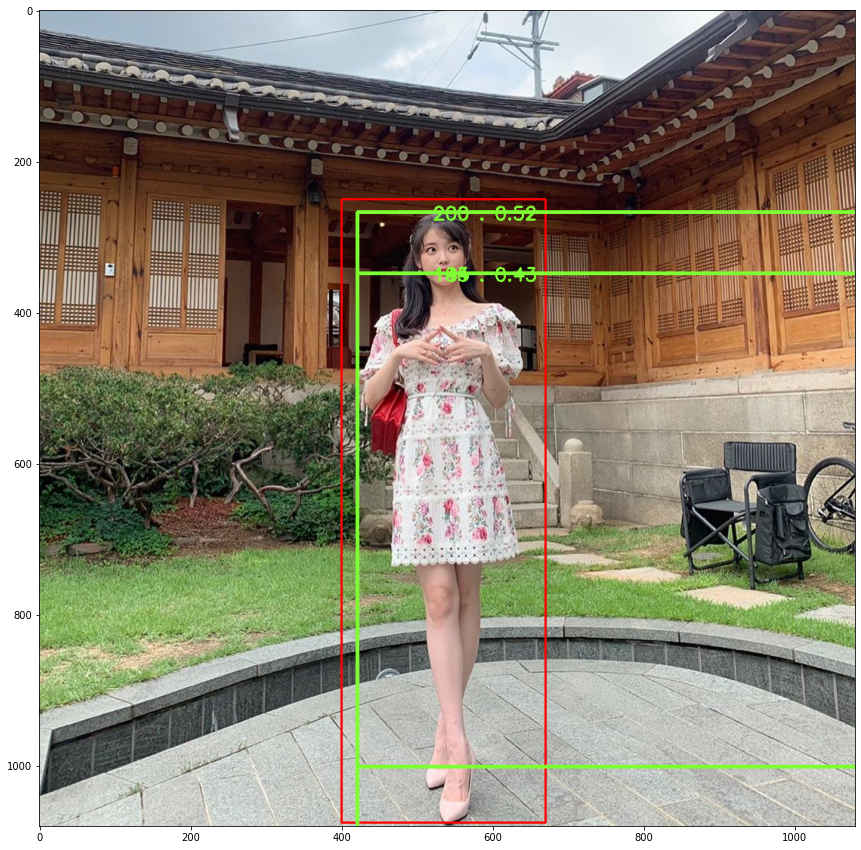

In [18]:
img = cv2.imread('./iu_cv.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('image shape', img.shape)

choice_rgb_cand = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
gt_box = [400, 250, 670, 1075] # Left, Top, Right, Bottom
choice_rgb_gt = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), choice_rgb_gt, thickness=2)

for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] = cand_box[2] + cand_box[0] # r = r+l (위치)
    cand_box[3] = cand_box[3] + cand_box[1] # b = t+b (위치)
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.3: # 임의의 비율, 일반적으로 0.6 사용
        print('index : ', index, 'iou : ', iou, 'rectangle : ', (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1], cand_box[2], cand_box[3]), choice_rgb_cand, thickness=3)
        text = "%d : %.2f"%(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color=choice_rgb_cand, thickness=2)

plt.figure(figsize=(15,15))
plt.imshow(img_rgb)
plt.show()